In [1]:
import polars as pl
import altair
import numpy as np


KeyboardInterrupt: 

In [2]:
# import other .py file to .ipynb file
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath(os.path.abspath(''))))
sys.path

['/usr/lib/python311.zip',
 '/usr/lib/python3.11',
 '/usr/lib/python3.11/lib-dynload',
 '',
 '/home/user/pandas-polar-dask/.venv/lib/python3.11/site-packages',
 '/home/user/pandas-polar-dask']

In [3]:

from util.logger.logger import logger
from app import ic
import cProfile
import pstats
ic('Hello')
logger.info('Hello')

2025-04-24 02:51:30.445 | INFO     | app:<module>:8 - 🚀 Start app
2025-04-24 02:51:30.448 | INFO     | app:<module>:10 - 💯 End app
2025-04-24 02:51:30.448 | INFO     | app:<module>:10 - 💯 End app
🔥 2025-04-24 09:51:30 |> 2343270815.py:5 in <module>- 'Hello'
2025-04-24 02:51:30.605 | INFO     | __main__:<module>:6 - Hello


In [4]:

fileName = '/home/user/pandas-polar-dask/data/sales_data_sample.xlsx'


In [5]:
# pip install fastexcel

In [6]:
# read data
df = pl.read_excel(fileName, sheet_id = 0) # sheet_id = 0 to load all sheets, if want to specific sheet, fill sheet_id = 1 or 2 or n, or sheet_name = <sheet name>
df

{'Sales_Data': shape: (1_000, 19)
 ┌───────────┬────────────┬────────────┬─────────┬───┬────────────┬───────────┬───────────┬─────────┐
 │ Order_ID  ┆ Date       ┆ Category   ┆ Region  ┆ … ┆ Shipping_C ┆ Profit_Ma ┆ Profit    ┆ Month   │
 │ ---       ┆ ---        ┆ ---        ┆ ---     ┆   ┆ ost        ┆ rgin      ┆ ---       ┆ ---     │
 │ str       ┆ datetime[m ┆ str        ┆ str     ┆   ┆ ---        ┆ ---       ┆ f64       ┆ str     │
 │           ┆ s]         ┆            ┆         ┆   ┆ f64        ┆ f64       ┆           ┆         │
 ╞═══════════╪════════════╪════════════╪═════════╪═══╪════════════╪═══════════╪═══════════╪═════════╡
 │ ORD-10000 ┆ 1970-01-01 ┆ Books      ┆ East    ┆ … ┆ 0.0        ┆ 0.33      ┆ 83.57712  ┆ 2024-07 │
 │           ┆ 07:30:45   ┆            ┆         ┆   ┆            ┆           ┆           ┆         │
 │ ORD-10001 ┆ 1970-01-01 ┆ Sports     ┆ West    ┆ … ┆ 0.0        ┆ 0.2       ┆ 251.784   ┆ 2025-03 │
 │           ┆ 07:30:46   ┆            ┆        

In [ ]:
logger.info(df['Sales_Data'].glimpse())

2025-04-24 02:51:35.417 | INFO     | __main__:<module>:1 - None


Rows: 1000
Columns: 19
$ Order_ID                  <str> 'ORD-10000', 'ORD-10001', 'ORD-10002', 'ORD-10003', 'ORD-10004', 'ORD-10005', 'ORD-10006', 'ORD-10007', 'ORD-10008', 'ORD-10009'
$ Date             <datetime[ms]> 1970-01-01 07:30:45, 1970-01-01 07:30:46, 1970-01-01 07:30:46, 1970-01-01 07:30:45, 1970-01-01 07:30:45, 1970-01-01 07:30:46, 1970-01-01 07:30:45, 1970-01-01 07:30:45, 1970-01-01 07:30:46, 1970-01-01 07:30:46
$ Category                  <str> 'Books', 'Sports', 'Home & Kitchen', 'Home & Kitchen', 'Electronics', 'Clothing', 'Clothing', 'Sports', 'Clothing', 'Books'
$ Region                    <str> 'East', 'West', 'Central', 'North', 'North', 'North', 'North', 'East', 'West', 'South'
$ Customer_Segment          <str> 'Business', 'Premium', 'Business', 'Regular', 'New', 'New', 'New', 'New', 'New', 'Premium'
$ Payment_Method            <str> 'PayPal', 'Bank Transfer', 'Bank Transfer', 'Credit Card', 'Bank Transfer', 'PayPal', 'Bank Transfer', 'PayPal', 'Debit Card', 'Credi

In [8]:
# create EDA function: head, tail, describe, glimse, shape,..

## EDA for Sales_Data

In [9]:
sales_data = df['Sales_Data']

In [10]:
sales_data.head()

Order_ID,Date,Category,Region,Customer_Segment,Payment_Method,Quantity,Unit_Price,Discount_Rate,Customer_Rating,Returned,Subcategory,Total_Price,Discount_Amount,Net_Sales,Shipping_Cost,Profit_Margin,Profit,Month
str,datetime[ms],str,str,str,str,i64,f64,f64,i64,str,str,f64,f64,f64,f64,f64,f64,str
"""ORD-10000""",1970-01-01 07:30:45,"""Books""","""East""","""Business""","""PayPal""",1,316.58,0.2,5,"""false""","""Comics""",316.58,63.316,253.264,0.0,0.33,83.57712,"""2024-07"""
"""ORD-10001""",1970-01-01 07:30:46,"""Sports""","""West""","""Premium""","""Bank Transfer""",5,279.76,0.1,null,"""true""","""Water Sports""",1398.8,139.88,1258.92,0.0,0.2,251.784,"""2025-03"""
"""ORD-10002""",1970-01-01 07:30:46,"""Home & Kitchen""","""Central""","""Business""","""Bank Transfer""",6,209.61,0.05,4,"""false""","""Furniture""",1257.66,62.883,1194.777,0.0,0.37,442.06749,"""2024-12"""
"""ORD-10003""",1970-01-01 07:30:45,"""Home & Kitchen""","""North""","""Regular""","""Credit Card""",3,265.47,0.15,4,"""false""","""Kitchenware""",796.41,119.4615,676.9485,0.0,0.23,155.698155,"""2024-07"""
"""ORD-10004""",1970-01-01 07:30:45,"""Electronics""","""North""","""New""","""Bank Transfer""",9,449.32,0.0,4,"""false""","""Accessories""",4043.88,0.0,4043.88,0.0,0.37,1496.2356,"""2024-06"""


In [11]:
sales_data.glimpse()

Rows: 1000
Columns: 19
$ Order_ID                  <str> 'ORD-10000', 'ORD-10001', 'ORD-10002', 'ORD-10003', 'ORD-10004', 'ORD-10005', 'ORD-10006', 'ORD-10007', 'ORD-10008', 'ORD-10009'
$ Date             <datetime[ms]> 1970-01-01 07:30:45, 1970-01-01 07:30:46, 1970-01-01 07:30:46, 1970-01-01 07:30:45, 1970-01-01 07:30:45, 1970-01-01 07:30:46, 1970-01-01 07:30:45, 1970-01-01 07:30:45, 1970-01-01 07:30:46, 1970-01-01 07:30:46
$ Category                  <str> 'Books', 'Sports', 'Home & Kitchen', 'Home & Kitchen', 'Electronics', 'Clothing', 'Clothing', 'Sports', 'Clothing', 'Books'
$ Region                    <str> 'East', 'West', 'Central', 'North', 'North', 'North', 'North', 'East', 'West', 'South'
$ Customer_Segment          <str> 'Business', 'Premium', 'Business', 'Regular', 'New', 'New', 'New', 'New', 'New', 'Premium'
$ Payment_Method            <str> 'PayPal', 'Bank Transfer', 'Bank Transfer', 'Credit Card', 'Bank Transfer', 'PayPal', 'Bank Transfer', 'PayPal', 'Debit Card', 'Credi

In [ ]:
sales_data.describe()

statistic,Order_ID,Date,Category,Region,Customer_Segment,Payment_Method,Quantity,Unit_Price,Discount_Rate,Customer_Rating,Returned,Subcategory,Total_Price,Discount_Amount,Net_Sales,Shipping_Cost,Profit_Margin,Profit,Month
str,str,str,str,str,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,str
"""count""","""1000""","""1000""","""1000""","""1000""","""1000""","""1000""",1000.0,1000.0,949.0,945.0,"""1000""","""1000""",1000.0,1000.0,1000.0,958.0,1000.0,1000.0,"""1000"""
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,51.0,55.0,"""0""","""0""",0.0,0.0,0.0,42.0,0.0,0.0,"""0"""
"""mean""",null,"""1970-01-01 07:30:45.689000""",null,null,null,null,5.078,254.37013,0.098367,3.708995,null,null,1305.12978,129.438433,1175.691347,1.433946,0.2984,351.559802,null
"""std""",null,null,null,null,null,null,2.533838,140.757989,0.069393,1.093593,null,null,1048.253701,155.924665,951.98294,4.238441,0.057922,298.512945,null
"""min""","""ORD-10000""","""1970-01-01 07:30:45""","""Books""","""Central""","""Business""","""Bank Transfer""",1.0,10.11,0.0,1.0,"""false""","""Accessories""",19.87,0.0,18.8765,0.0,0.2,4.55124,"""2024-04"""
"""25%""",null,"""1970-01-01 07:30:45""",null,null,null,null,3.0,135.76,0.05,3.0,null,null,422.94,16.02,376.5585,0.0,0.25,109.8048,null
"""50%""",null,"""1970-01-01 07:30:46""",null,null,null,null,5.0,246.91,0.1,4.0,null,null,1048.59,72.4,924.369,0.0,0.3,283.976,null
"""75%""",null,"""1970-01-01 07:30:46""",null,null,null,null,7.0,378.13,0.15,5.0,null,null,1935.84,181.832,1733.508,0.0,0.35,500.1408,null
"""max""","""ORD-10999""","""1970-01-01 07:30:46""","""Sports""","""West""","""Regular""","""PayPal""",9.0,499.41,0.2,5.0,"""true""","""Women""",4474.98,860.022,4304.43,19.86,0.4,1496.2356,"""2025-04"""


In [ ]:
sales_data_columns = sales_data.columns
sales_data_columns

['Order_ID',
 'Date',
 'Category',
 'Region',
 'Customer_Segment',
 'Payment_Method',
 'Quantity',
 'Unit_Price',
 'Discount_Rate',
 'Customer_Rating',
 'Returned',
 'Subcategory',
 'Total_Price',
 'Discount_Amount',
 'Net_Sales',
 'Shipping_Cost',
 'Profit_Margin',
 'Profit',
 'Month']

In [ ]:
# null values
# null != nan, null is lack of value, nan is sometime due to calculation result such as 0/0
# https://docs.pola.rs/user-guide/expressions/missing-data/#not-a-number-or-nan-values
# https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.null_count.html
sales_data.null_count()

Order_ID,Date,Category,Region,Customer_Segment,Payment_Method,Quantity,Unit_Price,Discount_Rate,Customer_Rating,Returned,Subcategory,Total_Price,Discount_Amount,Net_Sales,Shipping_Cost,Profit_Margin,Profit,Month
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,51,55,0,0,0,0,0,42,0,0,0


In [15]:
sales_data['Discount_Rate'].head()

Discount_Rate
f64
0.2
0.1
0.05
0.15
0.0
0.15
0.0
0.2
0.2


In [16]:
sales_data.filter(sales_data['Discount_Rate'].is_null())

Order_ID,Date,Category,Region,Customer_Segment,Payment_Method,Quantity,Unit_Price,Discount_Rate,Customer_Rating,Returned,Subcategory,Total_Price,Discount_Amount,Net_Sales,Shipping_Cost,Profit_Margin,Profit,Month
str,datetime[ms],str,str,str,str,i64,f64,f64,i64,str,str,f64,f64,f64,f64,f64,f64,str
"""ORD-10010""",1970-01-01 07:30:46,"""Clothing""","""East""","""Business""","""Bank Transfer""",6,302.5,null,3,"""false""","""Women""",1815.0,272.25,1542.75,0.0,0.29,447.3975,"""2025-02"""
"""ORD-10101""",1970-01-01 07:30:45,"""Books""","""West""","""Business""","""Debit Card""",8,131.78,null,2,"""false""","""Fiction""",1054.24,105.424,948.816,0.0,0.37,351.06192,"""2024-06"""
"""ORD-10119""",1970-01-01 07:30:45,"""Home & Kitchen""","""East""","""New""","""PayPal""",8,403.17,null,2,"""false""","""Bedding""",3225.36,645.072,2580.288,0.0,0.3,774.0864,"""2024-07"""
"""ORD-10134""",1970-01-01 07:30:45,"""Home & Kitchen""","""Central""","""Regular""","""Cash on Delivery""",6,133.63,null,2,"""false""","""Decor""",801.78,40.089,761.691,0.0,0.38,289.44258,"""2024-04"""
"""ORD-10137""",1970-01-01 07:30:46,"""Sports""","""East""","""Premium""","""PayPal""",4,36.28,null,null,"""false""","""Team Sports""",145.12,0.0,145.12,8.82,0.25,36.28,"""2024-09"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""ORD-10932""",1970-01-01 07:30:46,"""Electronics""","""East""","""Premium""","""Debit Card""",3,107.56,null,4,"""false""","""Cameras""",322.68,0.0,322.68,0.0,0.32,103.2576,"""2024-11"""
"""ORD-10951""",1970-01-01 07:30:46,"""Clothing""","""West""","""Regular""","""Debit Card""",3,140.73,null,3,"""false""","""Accessories""",422.19,42.219,379.971,0.0,0.29,110.19159,"""2025-03"""
"""ORD-10967""",1970-01-01 07:30:46,"""Clothing""","""West""","""Business""","""Cash on Delivery""",2,407.7,null,3,"""false""","""Women""",815.4,0.0,815.4,0.0,0.34,277.236,"""2025-02"""


In [ ]:
sales_data.select(pl.all().n_unique())
# https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.n_unique.html

Order_ID,Date,Category,Region,Customer_Segment,Payment_Method,Quantity,Unit_Price,Discount_Rate,Customer_Rating,Returned,Subcategory,Total_Price,Discount_Amount,Net_Sales,Shipping_Cost,Profit_Margin,Profit,Month
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
1000,2,5,5,4,5,9,994,6,6,2,23,998,817,999,105,21,999,13


In [ ]:
sales_data.filter(sales_data.is_unique())

Order_ID,Date,Category,Region,Customer_Segment,Payment_Method,Quantity,Unit_Price,Discount_Rate,Customer_Rating,Returned,Subcategory,Total_Price,Discount_Amount,Net_Sales,Shipping_Cost,Profit_Margin,Profit,Month
str,datetime[ms],str,str,str,str,i64,f64,f64,i64,str,str,f64,f64,f64,f64,f64,f64,str
"""ORD-10000""",1970-01-01 07:30:45,"""Books""","""East""","""Business""","""PayPal""",1,316.58,0.2,5,"""false""","""Comics""",316.58,63.316,253.264,0.0,0.33,83.57712,"""2024-07"""
"""ORD-10001""",1970-01-01 07:30:46,"""Sports""","""West""","""Premium""","""Bank Transfer""",5,279.76,0.1,null,"""true""","""Water Sports""",1398.8,139.88,1258.92,0.0,0.2,251.784,"""2025-03"""
"""ORD-10002""",1970-01-01 07:30:46,"""Home & Kitchen""","""Central""","""Business""","""Bank Transfer""",6,209.61,0.05,4,"""false""","""Furniture""",1257.66,62.883,1194.777,0.0,0.37,442.06749,"""2024-12"""
"""ORD-10003""",1970-01-01 07:30:45,"""Home & Kitchen""","""North""","""Regular""","""Credit Card""",3,265.47,0.15,4,"""false""","""Kitchenware""",796.41,119.4615,676.9485,0.0,0.23,155.698155,"""2024-07"""
"""ORD-10004""",1970-01-01 07:30:45,"""Electronics""","""North""","""New""","""Bank Transfer""",9,449.32,0.0,4,"""false""","""Accessories""",4043.88,0.0,4043.88,0.0,0.37,1496.2356,"""2024-06"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""ORD-10995""",1970-01-01 07:30:46,"""Sports""","""North""","""New""","""PayPal""",5,136.47,0.15,4,"""true""","""Team Sports""",682.35,102.3525,579.9975,0.0,0.39,226.199025,"""2024-08"""
"""ORD-10996""",1970-01-01 07:30:46,"""Electronics""","""Central""","""Business""","""Credit Card""",3,237.35,0.05,4,"""false""","""Audio""",712.05,35.6025,676.4475,0.0,0.39,263.814525,"""2025-02"""
"""ORD-10997""",1970-01-01 07:30:45,"""Books""","""West""","""Premium""","""Cash on Delivery""",1,75.31,0.1,2,"""false""","""Non-fiction""",75.31,7.531,67.779,5.16,0.22,14.91138,"""2024-05"""


In [19]:
sales_data.filter(sales_data.is_duplicated())

Order_ID,Date,Category,Region,Customer_Segment,Payment_Method,Quantity,Unit_Price,Discount_Rate,Customer_Rating,Returned,Subcategory,Total_Price,Discount_Amount,Net_Sales,Shipping_Cost,Profit_Margin,Profit,Month
str,datetime[ms],str,str,str,str,i64,f64,f64,i64,str,str,f64,f64,f64,f64,f64,f64,str


In [ ]:
sales_data.is_empty()

False

In [21]:
sales_data.estimated_size("mb")

0.14184856414794922

In [22]:
# copy df and clean
sales_data_clean = pl.DataFrame.clone(sales_data)


In [23]:
# Discount_Rate, Customer_Rating, Shipping_Cost is null
# so clean null data 
# way 1: Discount_Rate null can fill as 0
sales_data_clean = sales_data_clean.with_columns(
    pl.col("Discount_Rate").fill_null(0).alias("Discount_Rate")

)
sales_data_clean.filter(sales_data_clean['Discount_Rate'].is_null())

Order_ID,Date,Category,Region,Customer_Segment,Payment_Method,Quantity,Unit_Price,Discount_Rate,Customer_Rating,Returned,Subcategory,Total_Price,Discount_Amount,Net_Sales,Shipping_Cost,Profit_Margin,Profit,Month
str,datetime[ms],str,str,str,str,i64,f64,f64,i64,str,str,f64,f64,f64,f64,f64,f64,str


In [24]:
# way 2: all Discount_Amount is not null, so can count Discount_Rate by : Discount_Amount/Total_Price * 100 and round 2
sales_data_clean = sales_data_clean.with_columns(
    pl.col('Discount_Rate').fill_null((
        pl.col('Discount_Amount')/ pl.col('Total_Price')
    ).round(2)
    )
)

In [ ]:
sales_data_clean.filter(sales_data_clean['Discount_Rate'].is_null())

Order_ID,Date,Category,Region,Customer_Segment,Payment_Method,Quantity,Unit_Price,Discount_Rate,Customer_Rating,Returned,Subcategory,Total_Price,Discount_Amount,Net_Sales,Shipping_Cost,Profit_Margin,Profit,Month
str,datetime[ms],str,str,str,str,i64,f64,f64,i64,str,str,f64,f64,f64,f64,f64,f64,str


In [ ]:
sales_data_clean.filter(sales_data_clean['Order_ID']== "ORD-10010")

Order_ID,Date,Category,Region,Customer_Segment,Payment_Method,Quantity,Unit_Price,Discount_Rate,Customer_Rating,Returned,Subcategory,Total_Price,Discount_Amount,Net_Sales,Shipping_Cost,Profit_Margin,Profit,Month
str,datetime[ms],str,str,str,str,i64,f64,f64,i64,str,str,f64,f64,f64,f64,f64,f64,str
"""ORD-10010""",1970-01-01 07:30:46,"""Clothing""","""East""","""Business""","""Bank Transfer""",6,302.5,0.0,3,"""false""","""Women""",1815.0,272.25,1542.75,0.0,0.29,447.3975,"""2025-02"""


In [27]:
# Customer_Rating fill null by median
sales_data_clean = sales_data_clean.with_columns(
    pl.col("Customer_Rating").fill_null(pl.col("Customer_Rating").median())
)

In [28]:
# Shipping_Cost fill as median
sales_data_clean = sales_data_clean.with_columns(
    pl.col("Shipping_Cost").fill_null(pl.col("Shipping_Cost").median())
)

In [ ]:
import polars as pl
import random
from datetime import datetime, timedelta

# Function to generate a random datetime between two datetimes
def random_datetime(start, end):
    return start + timedelta(seconds=random.randint(0, int((end - start).total_seconds())))

# Create a Polars DataFrame with N rows
n = 10
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 12, 31)

df = pl.DataFrame({
    "random_datetime": [random_datetime(start_date, end_date) for _ in range(n)]
})

print(df)

shape: (10, 1)
┌─────────────────────┐
│ random_datetime     │
│ ---                 │
│ datetime[μs]        │
╞═════════════════════╡
│ 2023-03-14 14:26:01 │
│ 2024-11-24 10:47:24 │
│ 2024-04-27 10:28:31 │
│ 2023-07-29 05:51:18 │
│ 2023-02-13 21:38:12 │
│ 2023-05-23 15:41:15 │
│ 2024-03-28 08:35:50 │
│ 2024-04-04 10:47:19 │
│ 2024-06-17 04:40:17 │
│ 2023-02-17 16:10:31 │
└─────────────────────┘


In [30]:
# # fill random value due to Date just 1 day
# sales_data_clean = sales_data_clean.with_columns(
#     pl.Series(
#         "Date",
#         [random_datetime(start_date, end_date) for _ in range(sales_data_clean.height)]
#     ).cast(pl.Datetime("ms"))
# )
# sales_data_clean['Date'].head()

In [ ]:
# transfer Month to date time
sales_data_clean = sales_data_clean.with_columns(
    pl.col('Month').str.to_datetime(format = '%Y-%m').alias("Month_datetime")
)
sales_data_clean['Month_datetime'].head()

Month_datetime
datetime[μs]
2024-07-01 00:00:00
2025-03-01 00:00:00
2024-12-01 00:00:00
2024-07-01 00:00:00
2024-06-01 00:00:00
2024-10-01 00:00:00
2024-04-01 00:00:00
2024-07-01 00:00:00
2024-07-01 00:00:00


In [32]:
sales_data_clean = sales_data_clean.with_columns([
    pl.col("Month_datetime").dt.date().alias("Only_Date"),       # just the date (yyyy-mm-dd)
    pl.col("Month_datetime").dt.day().alias("day_of_month"), # just only day(dd)
    pl.col("Month_datetime").dt.ordinal_day().alias("day_of_year"), # day in year(1,100,300,..)
    pl.col("Month_datetime").dt.week().alias("Week_Number"),     # ISO week number (1-53)
    pl.col("Month_datetime").dt.time().alias("Only_Time")  ,      # time part (hh:mm:ss)
    pl.col("Month_datetime").dt.year().alias("Year"),
pl.col("Month_datetime").dt.month().alias("Month_Number"),
pl.col("Month_datetime").dt.weekday().alias("Weekday"),  # 0=Monday, 6=Sunday
])
# date must be datetime or time, not date

In [ ]:
sales_data_clean.head()

Order_ID,Date,Category,Region,Customer_Segment,Payment_Method,Quantity,Unit_Price,Discount_Rate,Customer_Rating,Returned,Subcategory,Total_Price,Discount_Amount,Net_Sales,Shipping_Cost,Profit_Margin,Profit,Month,Month_datetime,Only_Date,day_of_month,day_of_year,Week_Number,Only_Time,Year,Month_Number,Weekday
str,datetime[ms],str,str,str,str,i64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,str,datetime[μs],date,i8,i16,i8,time,i32,i8,i8
"""ORD-10000""",1970-01-01 07:30:45,"""Books""","""East""","""Business""","""PayPal""",1,316.58,0.2,5.0,"""false""","""Comics""",316.58,63.316,253.264,0.0,0.33,83.57712,"""2024-07""",2024-07-01 00:00:00,2024-07-01,1,183,27,00:00:00,2024,7,1
"""ORD-10001""",1970-01-01 07:30:46,"""Sports""","""West""","""Premium""","""Bank Transfer""",5,279.76,0.1,4.0,"""true""","""Water Sports""",1398.8,139.88,1258.92,0.0,0.2,251.784,"""2025-03""",2025-03-01 00:00:00,2025-03-01,1,60,9,00:00:00,2025,3,6
"""ORD-10002""",1970-01-01 07:30:46,"""Home & Kitchen""","""Central""","""Business""","""Bank Transfer""",6,209.61,0.05,4.0,"""false""","""Furniture""",1257.66,62.883,1194.777,0.0,0.37,442.06749,"""2024-12""",2024-12-01 00:00:00,2024-12-01,1,336,48,00:00:00,2024,12,7
"""ORD-10003""",1970-01-01 07:30:45,"""Home & Kitchen""","""North""","""Regular""","""Credit Card""",3,265.47,0.15,4.0,"""false""","""Kitchenware""",796.41,119.4615,676.9485,0.0,0.23,155.698155,"""2024-07""",2024-07-01 00:00:00,2024-07-01,1,183,27,00:00:00,2024,7,1
"""ORD-10004""",1970-01-01 07:30:45,"""Electronics""","""North""","""New""","""Bank Transfer""",9,449.32,0.0,4.0,"""false""","""Accessories""",4043.88,0.0,4043.88,0.0,0.37,1496.2356,"""2024-06""",2024-06-01 00:00:00,2024-06-01,1,153,22,00:00:00,2024,6,6


In [ ]:
sales_data_category = pl.DataFrame(sales_data_clean).lazy().group_by("Category", maintain_order=True).agg(
    pl.col("Unit_Price").mean().round(2).alias('Unit_Price_Avg'),
    pl.col("Discount_Rate").mean().round(2).alias('Discount_Rate_Avg'),
    pl.col("Customer_Rating").mean().round(2).alias('Customer_Rating_Avg'),
    pl.col("Total_Price").sum().round(2).alias('Total_Price_Sum'),
    pl.col("Discount_Amount").sum().round(2).alias('Discount_Amount_Sum'),
    pl.col("Net_Sales").sum().round(2).alias('Net_Sales_Sum'),
    pl.col("Shipping_Cost").sum().round(2).alias('Shipping_Cost_Sum'),
    pl.col("Profit_Margin").mean().round(2).alias('Profit_Margin_Avg'),
    pl.col("Profit").sum().round(2).alias('Profit_Sum'),
).collect()  

sales_data_category

Category,Unit_Price_Avg,Discount_Rate_Avg,Customer_Rating_Avg,Total_Price_Sum,Discount_Amount_Sum,Net_Sales_Sum,Shipping_Cost_Sum,Profit_Margin_Avg,Profit_Sum
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Books""",268.76,0.09,3.68,270046.39,25971.16,244075.23,195.93,0.3,74044.33
"""Sports""",267.67,0.1,3.79,276001.31,28664.53,247336.78,260.58,0.29,72506.84
"""Home & Kitchen""",247.16,0.09,3.65,241642.54,23749.65,217892.89,279.91,0.29,63909.35
"""Electronics""",235.93,0.09,3.7,255943.37,25014.83,230928.54,390.73,0.29,68667.04
"""Clothing""",253.45,0.09,3.79,261496.17,26038.27,235457.9,246.57,0.31,72432.25


In [35]:
sales_data_category_pd = sales_data_category.sort("Unit_Price_Avg", descending=False)
sales_data_category_pd = sales_data_category_pd.to_pandas()
sales_data_category_pd 

,Category,Unit_Price_Avg,Discount_Rate_Avg,Customer_Rating_Avg,Total_Price_Sum,Discount_Amount_Sum,Net_Sales_Sum,Shipping_Cost_Sum,Profit_Margin_Avg,Profit_Sum
0,Electronics,235.93,0.09,3.70,255943.37,25014.83,230928.54,390.73,0.29,68667.04
1,Home & Kitchen,247.16,0.09,3.65,241642.54,23749.65,217892.89,279.91,0.29,63909.35
2,Clothing,253.45,0.09,3.79,261496.17,26038.27,235457.90,246.57,0.31,72432.25
3,Sports,267.67,0.10,3.79,276001.31,28664.53,247336.78,260.58,0.29,72506.84
4,Books,268.76,0.09,3.68,270046.39,25971.16,244075.23,195.93,0.30,74044.33


In [36]:
import altair as alt
import pandas as pd  # Needed because Altair works with pandas DataFrames
sales_data_category_pd = sales_data_category.sort("Unit_Price_Avg", descending=False)
sales_data_category_pd = sales_data_category_pd.to_pandas()
# Create bar chart with Altair
chart = alt.Chart(sales_data_category_pd).mark_bar().encode(
    x=alt.X('Category:N', title='Category'),
    y=alt.Y('Unit_Price_Avg:Q', title='Unit_Price_Avg'),
    color=alt.Color('Category:N', scale=alt.Scale(scheme='viridis')),  # or "category10", "viridis", etc.
    tooltip=['Category', 'Unit_Price_Avg']
).properties(
    title='Unit_Price_Avg by Category',
    width=500,
    height=300
)

chart.display()  # or chart.show() in some environments
'''
Channel Type Codes:

Code	Meaning	Used For
Q	Quantitative	Numeric data, e.g. sales, prices, age
N	Nominal	Categories (unordered), e.g. product names, cities
O	Ordinal	Ordered categories, e.g. star ratings
T	Temporal	Date/time fields
'''

alt.Chart(...)

'\nChannel Type Codes:\n\nCode\tMeaning\tUsed For\nQ\tQuantitative\tNumeric data, e.g. sales, prices, age\nN\tNominal\tCategories (unordered), e.g. product names, cities\nO\tOrdinal\tOrdered categories, e.g. star ratings\nT\tTemporal\tDate/time fields\n'

In [37]:
import altair as alt
import pandas as pd  # Needed because Altair works with pandas DataFrames
Net_Sales_Sum = sales_data_category.sort("Net_Sales_Sum", descending=False)
Net_Sales_Sum_pd = Net_Sales_Sum.to_pandas()
# Create bar chart with Altair
chart = alt.Chart(Net_Sales_Sum_pd).mark_bar(color='steelblue').encode(
    x=alt.X('Category:N', title='Category', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Net_Sales_Sum:Q', title='Net_Sales_Sum'),
    color=alt.Color('Category:N'),  
    tooltip=['Category', 'Net_Sales_Sum']
).properties(
    title='Net_Sales_Sum by Category',
    width=500,  # 🔹 Set chart width
    height=300
)
# Text labels on top of bars
text = alt.Chart(df).mark_text(
    align='center',
    baseline='bottom',
    dy=-5,  # move text 5px above the bar
    fontSize=12
).encode(
    x='Category:N',
    y='Net_Sales_Sum:Q',
    text='Net_Sales_Sum:Q'
)

# Combine chart and text
chart = chart + text
chart.properties(title='Net_Sales_Sum').configure_axis(labelFontSize=12, titleFontSize=14)
chart.display()

alt.LayerChart(...)

In [38]:
import altair as alt
import pandas as pd  # Needed because Altair works with pandas DataFrames
sales_data_category_pd = sales_data_category.sort("Customer_Rating_Avg", descending=False)
sales_data_category_pd = sales_data_category_pd.to_pandas()
# Create bar chart with Altair
chart = alt.Chart(sales_data_category_pd).mark_bar().encode(
    x=alt.X('Category:N', title='Category'),
    y=alt.Y('Customer_Rating_Avg:O', title='Customer_Rating_Avg'),
    color=alt.Color('Category:N', scale=alt.Scale(scheme='viridis')),  # or "category10", "viridis", etc.
    tooltip=['Category', 'Customer_Rating_Avg']
).properties(
    title='Customer_Rating_Avg by Category',
    width=500,
    height=300
)

chart.display()

alt.Chart(...)

In [39]:
Net_Sales_Sum_All = Net_Sales_Sum.select(pl.col("Net_Sales_Sum").sum()).item()
Net_Sales_Sum_All

1175691.34

In [40]:
Net_Sales_Sum = Net_Sales_Sum.with_columns(
    (pl.col('Net_Sales_Sum') / Net_Sales_Sum_All * 100).round(2).alias('Net_Sales_Ratio')
)
Net_Sales_Sum.select(pl.col('Category'),pl.col('Net_Sales_Sum') ,pl.col('Net_Sales_Ratio'))

Category,Net_Sales_Sum,Net_Sales_Ratio
str,f64,f64
"""Home & Kitchen""",217892.89,18.53
"""Electronics""",230928.54,19.64
"""Clothing""",235457.9,20.03
"""Books""",244075.23,20.76
"""Sports""",247336.78,21.04


In [41]:
# Create pie chart
chart = alt.Chart(Net_Sales_Sum).mark_arc(innerRadius=50, tooltip = True).encode(
    theta=alt.Theta(field="Net_Sales_Ratio", type="quantitative"),
    color=alt.Color(field="Category", type="nominal"),
).properties(
    width=400,
    height=400,
    title="Net_Sales_Ratio by Category"
)

# Combine chart and labels
chart.display()

alt.Chart(...)

In [42]:
sales_data_weekday = pl.DataFrame(sales_data_clean).lazy().group_by('Weekday', maintain_order=True).agg(
    pl.col("Unit_Price").mean().round(2).alias('Unit_Price_Avg'),
    pl.col("Discount_Rate").mean().round(2).alias('Discount_Rate_Avg'),
    pl.col("Customer_Rating").mean().round(2).alias('Customer_Rating_Avg'),
    pl.col("Total_Price").sum().round(2).alias('Total_Price_Sum'),
    pl.col("Discount_Amount").sum().round(2).alias('Discount_Amount_Sum'),
    pl.col("Net_Sales").sum().round(2).alias('Net_Sales_Sum'),
    pl.col("Shipping_Cost").sum().round(2).alias('Shipping_Cost_Sum'),
    pl.col("Profit_Margin").mean().round(2).alias('Profit_Margin_Avg'),
    pl.col("Profit").sum().round(2).alias('Profit_Sum'),
).collect()
sales_data_weekday

Weekday,Unit_Price_Avg,Discount_Rate_Avg,Customer_Rating_Avg,Total_Price_Sum,Discount_Amount_Sum,Net_Sales_Sum,Shipping_Cost_Sum,Profit_Margin_Avg,Profit_Sum
i8,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,254.02,0.09,3.75,233409.71,20243.33,213166.38,291.93,0.3,63408.6
6,263.36,0.09,3.77,274947.51,27446.88,247500.63,298.06,0.3,73183.69
7,238.08,0.1,3.64,199609.72,22649.88,176959.84,230.18,0.3,52397.14
2,302.48,0.09,3.58,124427.68,11129.25,113298.43,106.57,0.29,33307.2
5,243.53,0.1,3.65,132587.77,14662.28,117925.49,109.26,0.31,36440.63
4,261.25,0.1,3.78,126895.04,12459.7,114435.34,112.26,0.31,35947.89
3,239.87,0.1,3.8,213252.35,20847.11,192405.24,225.46,0.29,56874.65


In [43]:
line_high = alt.Chart(
    sales_data_weekday
    ).mark_line(color='red', tooltip = True).encode(
    x='Weekday:N',
    y='Net_Sales_Sum:Q'
)

line_median = alt.Chart(
    sales_data_weekday
    ).mark_line(color='blue', tooltip = True).encode(
    x='Weekday:N',
     y='Profit_Sum:Q'
)

(line_high + line_median).properties(
    title='Net sales sum and profit sum per weekday',
    width=1000,
    height= 500
)
(line_high + line_median).display()
# line_median.display()

alt.LayerChart(...)

In [44]:
sales_data_weekday = sales_data_weekday.sort('Weekday', descending = False)
sales_data_weekday

Weekday,Unit_Price_Avg,Discount_Rate_Avg,Customer_Rating_Avg,Total_Price_Sum,Discount_Amount_Sum,Net_Sales_Sum,Shipping_Cost_Sum,Profit_Margin_Avg,Profit_Sum
i8,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,254.02,0.09,3.75,233409.71,20243.33,213166.38,291.93,0.3,63408.6
2,302.48,0.09,3.58,124427.68,11129.25,113298.43,106.57,0.29,33307.2
3,239.87,0.1,3.8,213252.35,20847.11,192405.24,225.46,0.29,56874.65
4,261.25,0.1,3.78,126895.04,12459.7,114435.34,112.26,0.31,35947.89
5,243.53,0.1,3.65,132587.77,14662.28,117925.49,109.26,0.31,36440.63
6,263.36,0.09,3.77,274947.51,27446.88,247500.63,298.06,0.3,73183.69
7,238.08,0.1,3.64,199609.72,22649.88,176959.84,230.18,0.3,52397.14


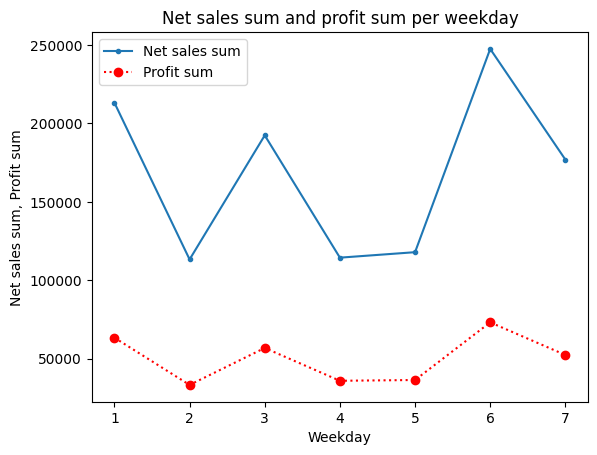

In [45]:
import matplotlib.pyplot as plt
plt.plot(sales_data_weekday.select(pl.col('Weekday')), sales_data_weekday.select(pl.col('Net_Sales_Sum')), marker='.', label = 'Net sales sum')
plt.plot(sales_data_weekday.select(pl.col('Weekday')), sales_data_weekday.select(pl.col('Profit_Sum')), marker='o', color= 'red', label = 'Profit sum', linestyle = ':')

plt.xlabel('Weekday')
plt.ylabel('Net sales sum, Profit sum')
plt.title('Net sales sum and profit sum per weekday')
plt.legend()
plt.show()

In [46]:
sales_data_clean.head()

Order_ID,Date,Category,Region,Customer_Segment,Payment_Method,Quantity,Unit_Price,Discount_Rate,Customer_Rating,Returned,Subcategory,Total_Price,Discount_Amount,Net_Sales,Shipping_Cost,Profit_Margin,Profit,Month,Month_datetime,Only_Date,day_of_month,day_of_year,Week_Number,Only_Time,Year,Month_Number,Weekday
str,datetime[ms],str,str,str,str,i64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,str,datetime[μs],date,i8,i16,i8,time,i32,i8,i8
"""ORD-10000""",1970-01-01 07:30:45,"""Books""","""East""","""Business""","""PayPal""",1,316.58,0.2,5.0,"""false""","""Comics""",316.58,63.316,253.264,0.0,0.33,83.57712,"""2024-07""",2024-07-01 00:00:00,2024-07-01,1,183,27,00:00:00,2024,7,1
"""ORD-10001""",1970-01-01 07:30:46,"""Sports""","""West""","""Premium""","""Bank Transfer""",5,279.76,0.1,4.0,"""true""","""Water Sports""",1398.8,139.88,1258.92,0.0,0.2,251.784,"""2025-03""",2025-03-01 00:00:00,2025-03-01,1,60,9,00:00:00,2025,3,6
"""ORD-10002""",1970-01-01 07:30:46,"""Home & Kitchen""","""Central""","""Business""","""Bank Transfer""",6,209.61,0.05,4.0,"""false""","""Furniture""",1257.66,62.883,1194.777,0.0,0.37,442.06749,"""2024-12""",2024-12-01 00:00:00,2024-12-01,1,336,48,00:00:00,2024,12,7
"""ORD-10003""",1970-01-01 07:30:45,"""Home & Kitchen""","""North""","""Regular""","""Credit Card""",3,265.47,0.15,4.0,"""false""","""Kitchenware""",796.41,119.4615,676.9485,0.0,0.23,155.698155,"""2024-07""",2024-07-01 00:00:00,2024-07-01,1,183,27,00:00:00,2024,7,1
"""ORD-10004""",1970-01-01 07:30:45,"""Electronics""","""North""","""New""","""Bank Transfer""",9,449.32,0.0,4.0,"""false""","""Accessories""",4043.88,0.0,4043.88,0.0,0.37,1496.2356,"""2024-06""",2024-06-01 00:00:00,2024-06-01,1,153,22,00:00:00,2024,6,6


In [47]:
# Regional performance
regional_performance = pl.DataFrame(sales_data_clean).lazy().group_by('Region',maintain_order=True ).agg(
    pl.col('Order_ID').count().alias('Order_Count'),
    pl.col('Net_Sales').sum().alias('Net_Sales_Sum'),
    pl.col('Profit').sum().alias('Profit_Sum'),
    pl.col('Customer_Rating').mean().alias('Avg_Rating')
).collect()

regional_performance = regional_performance.sort('Net_Sales_Sum', descending = False)
regional_performance

Region,Order_Count,Net_Sales_Sum,Profit_Sum,Avg_Rating
str,u32,f64,f64,f64
"""East""",184,211852.5935,61984.634525,3.820652
"""North""",192,226786.537,67503.41434,3.786458
"""Central""",201,231315.5835,69882.211355,3.701493
"""South""",192,242684.995,72996.38877,3.645833
"""West""",231,263051.638,79193.15265,3.683983


In [48]:
# Performance by customer segment
segment_performance = pl.DataFrame(sales_data_clean).lazy().group_by('Customer_Segment').agg(
    pl.col('Order_ID').count().alias('Order_Count'),
    pl.col('Net_Sales').sum().round(2).alias('Net_Sales'),
    pl.col('Profit').sum().round(2).alias('Profit'),
    pl.col('Customer_Rating').mean().round(2).alias('Avg_Rating'),
).collect()
segment_performance = segment_performance.with_columns(
     (pl.col('Net_Sales') / pl.col('Order_Count')).round(2).alias('Average_Order_Value')
)
segment_performance = segment_performance.sort('Net_Sales', descending=False)
segment_performance

Customer_Segment,Order_Count,Net_Sales,Profit,Avg_Rating,Average_Order_Value
str,u32,f64,f64,f64,f64
"""Premium""",248,274315.79,80627.51,3.83,1106.11
"""Business""",245,287819.24,89101.68,3.67,1174.77
"""Regular""",234,301431.01,88922.74,3.71,1288.17
"""New""",273,312125.3,92907.87,3.7,1143.32


In [49]:
# Payment method analysis
payment_analysis = pl.DataFrame(sales_data_clean).lazy().group_by('Payment_Method').agg(
pl.col('Order_ID').count().alias('Order_Count'),
    pl.col('Net_Sales').sum().round(2).alias('Net_Sales'),

).collect()
Order_Count_Sum = payment_analysis.select(pl.col('Order_Count').sum().round(2)).item()
payment_analysis = payment_analysis.with_columns(
    (pl.col('Net_Sales') / pl.col('Order_Count')).round(2).alias('Average_Order_Value'),
    (pl.col('Order_Count') / Order_Count_Sum * 100).round(2).alias('Percent_Orders')
)
payment_analysis = payment_analysis.sort('Order_Count', descending=False)
payment_analysis

Payment_Method,Order_Count,Net_Sales,Average_Order_Value,Percent_Orders
str,u32,f64,f64,f64
"""Bank Transfer""",187,223511.65,1195.25,18.7
"""Debit Card""",192,228706.76,1191.18,19.2
"""Credit Card""",201,237413.88,1181.16,20.1
"""Cash on Delivery""",203,241421.24,1189.27,20.3
"""PayPal""",217,244637.83,1127.36,21.7


In [50]:
a = sales_data_clean['Returned'].str.replace('false',0).str.replace('true',1).str.to_integer(base=2, strict=False)
a.sum()

111

In [51]:
# Return rate analysis
sales_data_clean = sales_data_clean.with_columns(
    pl.col('Returned').str.replace('false',0).str.replace('true',1).str.to_integer(base=2, strict=False).alias('Returned_Num')
)
return_analysis = pl.DataFrame(sales_data_clean).lazy().group_by('Category').agg(
    pl.col('Returned').count().alias('Total_Orders'),
    pl.col('Returned_Num').sum().alias('Total_Returns'),
).collect()
return_analysis = return_analysis.with_columns(
(pl.col('Total_Returns')/ pl.col('Total_Orders')).round(2).alias('Return_Rate')
)
return_analysis = return_analysis.sort('Return_Rate', descending=False)
return_analysis

Category,Total_Orders,Total_Returns,Return_Rate
str,u32,i64,f64
"""Home & Kitchen""",195,16,0.08
"""Clothing""",204,20,0.1
"""Books""",186,18,0.1
"""Electronics""",208,20,0.1
"""Sports""",207,37,0.18


In [52]:
sales_data_clean.head()

Order_ID,Date,Category,Region,Customer_Segment,Payment_Method,Quantity,Unit_Price,Discount_Rate,Customer_Rating,Returned,Subcategory,Total_Price,Discount_Amount,Net_Sales,Shipping_Cost,Profit_Margin,Profit,Month,Month_datetime,Only_Date,day_of_month,day_of_year,Week_Number,Only_Time,Year,Month_Number,Weekday,Returned_Num
str,datetime[ms],str,str,str,str,i64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,str,datetime[μs],date,i8,i16,i8,time,i32,i8,i8,i64
"""ORD-10000""",1970-01-01 07:30:45,"""Books""","""East""","""Business""","""PayPal""",1,316.58,0.2,5.0,"""false""","""Comics""",316.58,63.316,253.264,0.0,0.33,83.57712,"""2024-07""",2024-07-01 00:00:00,2024-07-01,1,183,27,00:00:00,2024,7,1,0
"""ORD-10001""",1970-01-01 07:30:46,"""Sports""","""West""","""Premium""","""Bank Transfer""",5,279.76,0.1,4.0,"""true""","""Water Sports""",1398.8,139.88,1258.92,0.0,0.2,251.784,"""2025-03""",2025-03-01 00:00:00,2025-03-01,1,60,9,00:00:00,2025,3,6,1
"""ORD-10002""",1970-01-01 07:30:46,"""Home & Kitchen""","""Central""","""Business""","""Bank Transfer""",6,209.61,0.05,4.0,"""false""","""Furniture""",1257.66,62.883,1194.777,0.0,0.37,442.06749,"""2024-12""",2024-12-01 00:00:00,2024-12-01,1,336,48,00:00:00,2024,12,7,0
"""ORD-10003""",1970-01-01 07:30:45,"""Home & Kitchen""","""North""","""Regular""","""Credit Card""",3,265.47,0.15,4.0,"""false""","""Kitchenware""",796.41,119.4615,676.9485,0.0,0.23,155.698155,"""2024-07""",2024-07-01 00:00:00,2024-07-01,1,183,27,00:00:00,2024,7,1,0
"""ORD-10004""",1970-01-01 07:30:45,"""Electronics""","""North""","""New""","""Bank Transfer""",9,449.32,0.0,4.0,"""false""","""Accessories""",4043.88,0.0,4043.88,0.0,0.37,1496.2356,"""2024-06""",2024-06-01 00:00:00,2024-06-01,1,153,22,00:00:00,2024,6,6,0


In [53]:
# Pivot: Customer Segment, Payment Method vs Net_Sales
# sales_data_clean = sales_data_clean.with_row_index()
segment_payment = sales_data_clean.pivot(
    on = 'Payment_Method',
index='Customer_Segment',
values="Net_Sales", aggregate_function=pl.element().sum().round(2))
segment_payment

Customer_Segment,PayPal,Bank Transfer,Credit Card,Debit Card,Cash on Delivery
str,f64,f64,f64,f64,f64
"""Business""",69861.63,45374.58,61940.17,55522.87,55120.0
"""Premium""",54421.14,63351.67,53254.16,44624.66,58664.15
"""Regular""",58291.36,56540.01,49487.61,61974.5,75137.53
"""New""",62063.7,58245.39,72731.93,66584.72,52499.55


In [54]:
# Cross-tabulation: Customer Segment vs Payment Method 
sales_df = sales_data_clean.to_pandas()
segment_payment = pd.crosstab(
index=sales_df ['Customer_Segment'],
columns=sales_df['Payment_Method'],
normalize='index' # Show as percentage of row
) * 100 # Convert to percentage
segment_payment = segment_payment.reset_index().round(2)
segment_payment = pl.from_pandas(segment_payment)
segment_payment

Customer_Segment,Bank Transfer,Cash on Delivery,Credit Card,Debit Card,PayPal
str,f64,f64,f64,f64,f64
"""Business""",15.1,19.18,22.45,18.78,24.49
"""New""",19.05,16.48,21.98,21.25,21.25
"""Premium""",20.97,23.79,18.15,16.13,20.97
"""Regular""",19.66,22.22,17.52,20.51,20.09


In [55]:
# Correlation between numerical variables
corr_columns = ['Quantity', 'Unit_Price', 'Discount_Rate', 'Total_Price', 'Net_Sales', 'Profit', 'Customer_Rating']
correlation = sales_data_clean.select(corr_columns).corr().with_columns(index = pl.lit(pl.Series(corr_columns))).unpivot(index = "index").filter(pl.col("index") != pl.col("variable")).filter(pl.col("value").abs() >= 0.5).sort('value', descending = True)
correlation
'''
.with_columns(index = pl.lit(pl.Series(corr_columns))):  represents the row labels — one for each variable.

.unpivot(index = "index"):
This melts (un-pivots) the wide-format correlation matrix into a long/tidy format:
index: row variable
variable: column variable
value: correlation value
'''

'\n.with_columns(index = pl.lit(pl.Series(corr_columns))):  represents the row labels — one for each variable.\n\n.unpivot(index = "index"):\nThis melts (un-pivots) the wide-format correlation matrix into a long/tidy format:\nindex: row variable\nvariable: column variable\nvalue: correlation value\n'

In [56]:
sales_data_clean.select(corr_columns).corr().with_columns(index = pl.lit(pl.Series(corr_columns))).unpivot(index = "index").filter(pl.col("index") != pl.col("variable")).filter(pl.col("value").abs() > 0.5).sort('value', descending = True)

index,variable,value
str,str,f64
"""Net_Sales""","""Total_Price""",0.992462
"""Total_Price""","""Net_Sales""",0.992462
"""Profit""","""Net_Sales""",0.954407
"""Net_Sales""","""Profit""",0.954407
"""Profit""","""Total_Price""",0.948724
…,…,…
"""Quantity""","""Total_Price""",0.652162
"""Net_Sales""","""Quantity""",0.644385
"""Quantity""","""Net_Sales""",0.644385


In [57]:
sales_data_clean.select(corr_columns).corr().with_columns(index = pl.lit(pl.Series(corr_columns)))

Quantity,Unit_Price,Discount_Rate,Total_Price,Net_Sales,Profit,Customer_Rating,index
f64,f64,f64,f64,f64,f64,f64,str
1.0,0.037716,0.043516,0.652162,0.644385,0.620293,-0.032843,"""Quantity"""
0.037716,1.0,-0.035331,0.700434,0.698009,0.664533,-0.016885,"""Unit_Price"""
0.043516,-0.035331,1.0,-0.004685,-0.091884,-0.074059,0.014845,"""Discount_Rate"""
0.652162,0.700434,-0.004685,1.0,0.992462,0.948724,-0.037155,"""Total_Price"""
0.644385,0.698009,-0.091884,0.992462,1.0,0.954407,-0.033582,"""Net_Sales"""
0.620293,0.664533,-0.074059,0.948724,0.954407,1.0,-0.019238,"""Profit"""
-0.032843,-0.016885,0.014845,-0.037155,-0.033582,-0.019238,1.0,"""Customer_Rating"""


In [58]:
sales_data_clean.select(corr_columns).corr().with_columns(index = pl.lit(pl.Series(corr_columns))).partition_by(by=["index"],
                  as_dict=True,
                  maintain_order=True)

{('Quantity',): shape: (1, 8)
 ┌──────────┬────────────┬─────────────┬─────────────┬───────────┬──────────┬────────────┬──────────┐
 │ Quantity ┆ Unit_Price ┆ Discount_Ra ┆ Total_Price ┆ Net_Sales ┆ Profit   ┆ Customer_R ┆ index    │
 │ ---      ┆ ---        ┆ te          ┆ ---         ┆ ---       ┆ ---      ┆ ating      ┆ ---      │
 │ f64      ┆ f64        ┆ ---         ┆ f64         ┆ f64       ┆ f64      ┆ ---        ┆ str      │
 │          ┆            ┆ f64         ┆             ┆           ┆          ┆ f64        ┆          │
 ╞══════════╪════════════╪═════════════╪═════════════╪═══════════╪══════════╪════════════╪══════════╡
 │ 1.0      ┆ 0.037716   ┆ 0.043516    ┆ 0.652162    ┆ 0.644385  ┆ 0.620293 ┆ -0.032843  ┆ Quantity │
 └──────────┴────────────┴─────────────┴─────────────┴───────────┴──────────┴────────────┴──────────┘,
 ('Unit_Price',): shape: (1, 8)
 ┌──────────┬────────────┬────────────┬────────────┬───────────┬──────────┬────────────┬────────────┐
 │ Quantity ┆ Unit_

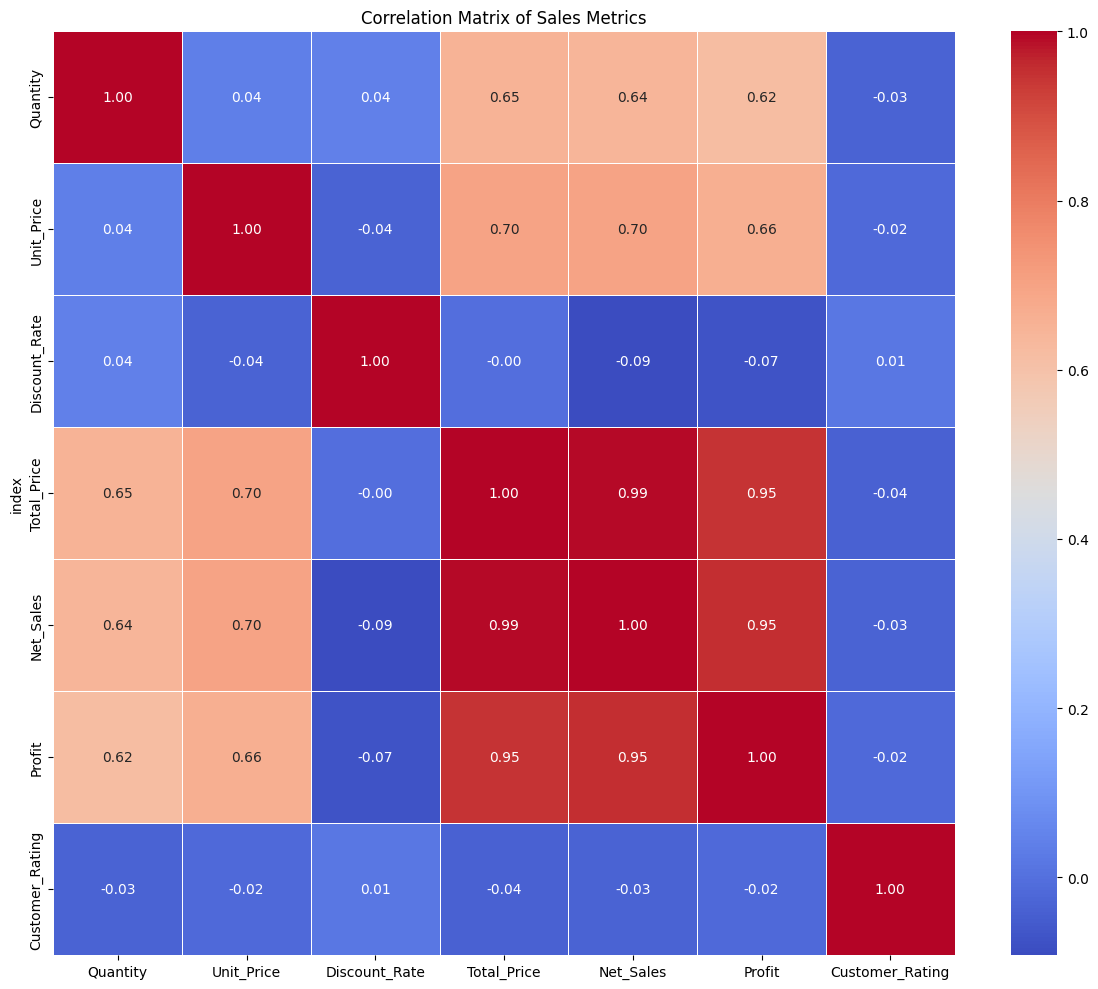

In [59]:
# 5. Heatmap: Correlation matrix
import seaborn as sns
plt.figure(figsize=(12, 10))
corr_matrix = sales_data_clean.select(corr_columns).corr().with_columns(index = pl.lit(pl.Series(corr_columns)))
corr_matrix = corr_matrix.to_pandas().set_index('index')
# want polar matrix can have str label as pandas
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) 
plt.title('Correlation Matrix of Sales Metrics')
plt.tight_layout()
plt.show()

In [60]:
sales_data_clean.pivot(
values='Net_Sales',
index='Category',
on='Region',
aggregate_function='sum')

Category,East,West,Central,North,South
str,f64,f64,f64,f64,f64
"""Books""",46285.424,58721.3825,37286.814,63186.1205,38595.4915
"""Sports""",46605.521,47296.989,45741.6075,54813.667,52878.998
"""Home & Kitchen""",40452.935,51626.084,48312.201,37274.731,40226.9375
"""Electronics""",34250.072,49493.9975,52200.2895,32545.077,62439.1055
"""Clothing""",44258.6415,55913.185,47774.6715,38966.9415,48544.4625


### "Customer_Data"

In [61]:
df.keys()

AttributeError: 'DataFrame' object has no attribute 'keys'

In [181]:
customer_data = pl.read_excel(fileName, sheet_name = 'Customer_Data')
customer_data.head()

Customer_ID,Order_ID,Age_Group,Gender,Member_Since,Device,Browser,First_Purchase
str,str,str,str,datetime[ms],str,str,str
"""CUST-1430""","""ORD-10000""","""35-44""","""Female""",1970-01-01 07:30:45,"""Mobile""","""Firefox""","""false"""
"""CUST-1494""","""ORD-10001""","""45-54""","""Female""",1970-01-01 07:30:44,"""Mobile""","""Chrome""","""false"""
"""CUST-1099""","""ORD-10002""","""18-24""","""Female""",1970-01-01 07:30:45,"""Desktop""","""Safari""","""false"""
"""CUST-1022""","""ORD-10003""","""55+""","""Female""",1970-01-01 07:30:45,"""Mobile""","""Safari""","""true"""
"""CUST-1419""","""ORD-10004""","""25-34""","""Female""",1970-01-01 07:30:45,"""Mobile""","""Firefox""","""false"""


In [182]:
customer_data.null_count()

Customer_ID,Order_ID,Age_Group,Gender,Member_Since,Device,Browser,First_Purchase
u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0


In [185]:
customer_data.filter(customer_data.is_duplicated())

Customer_ID,Order_ID,Age_Group,Gender,Member_Since,Device,Browser,First_Purchase
str,str,str,str,datetime[ms],str,str,str


In [188]:
sales_customer = sales_data_clean.join( customer_data, on="Order_ID", how="left", maintain_order= 'left', nulls_equal = True)
sales_customer.head()

index,Order_ID,Date,Category,Region,Customer_Segment,Payment_Method,Quantity,Unit_Price,Discount_Rate,Customer_Rating,Returned,Subcategory,Total_Price,Discount_Amount,Net_Sales,Shipping_Cost,Profit_Margin,Profit,Month,Month_datetime,Only_Date,day_of_month,day_of_year,Week_Number,Only_Time,Year,Month_Number,Weekday,Returned_Num,Customer_ID,Age_Group,Gender,Member_Since,Device,Browser,First_Purchase
u32,str,datetime[ms],str,str,str,str,i64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,str,datetime[μs],date,i8,i16,i8,time,i32,i8,i8,i64,str,str,str,datetime[ms],str,str,str
0,"""ORD-10000""",1970-01-01 07:30:45,"""Books""","""East""","""Business""","""PayPal""",1,316.58,0.2,5.0,"""false""","""Comics""",316.58,63.316,253.264,0.0,0.33,83.57712,"""2024-07""",2024-07-01 00:00:00,2024-07-01,1,183,27,00:00:00,2024,7,1,0,"""CUST-1430""","""35-44""","""Female""",1970-01-01 07:30:45,"""Mobile""","""Firefox""","""false"""
1,"""ORD-10001""",1970-01-01 07:30:46,"""Sports""","""West""","""Premium""","""Bank Transfer""",5,279.76,0.1,4.0,"""true""","""Water Sports""",1398.8,139.88,1258.92,0.0,0.2,251.784,"""2025-03""",2025-03-01 00:00:00,2025-03-01,1,60,9,00:00:00,2025,3,6,1,"""CUST-1494""","""45-54""","""Female""",1970-01-01 07:30:44,"""Mobile""","""Chrome""","""false"""
2,"""ORD-10002""",1970-01-01 07:30:46,"""Home & Kitchen""","""Central""","""Business""","""Bank Transfer""",6,209.61,0.05,4.0,"""false""","""Furniture""",1257.66,62.883,1194.777,0.0,0.37,442.06749,"""2024-12""",2024-12-01 00:00:00,2024-12-01,1,336,48,00:00:00,2024,12,7,0,"""CUST-1099""","""18-24""","""Female""",1970-01-01 07:30:45,"""Desktop""","""Safari""","""false"""
3,"""ORD-10003""",1970-01-01 07:30:45,"""Home & Kitchen""","""North""","""Regular""","""Credit Card""",3,265.47,0.15,4.0,"""false""","""Kitchenware""",796.41,119.4615,676.9485,0.0,0.23,155.698155,"""2024-07""",2024-07-01 00:00:00,2024-07-01,1,183,27,00:00:00,2024,7,1,0,"""CUST-1022""","""55+""","""Female""",1970-01-01 07:30:45,"""Mobile""","""Safari""","""true"""
4,"""ORD-10004""",1970-01-01 07:30:45,"""Electronics""","""North""","""New""","""Bank Transfer""",9,449.32,0.0,4.0,"""false""","""Accessories""",4043.88,0.0,4043.88,0.0,0.37,1496.2356,"""2024-06""",2024-06-01 00:00:00,2024-06-01,1,153,22,00:00:00,2024,6,6,0,"""CUST-1419""","""25-34""","""Female""",1970-01-01 07:30:45,"""Mobile""","""Firefox""","""false"""


In [189]:
sales_customer.filter(pl.col('Customer_ID').is_null())

index,Order_ID,Date,Category,Region,Customer_Segment,Payment_Method,Quantity,Unit_Price,Discount_Rate,Customer_Rating,Returned,Subcategory,Total_Price,Discount_Amount,Net_Sales,Shipping_Cost,Profit_Margin,Profit,Month,Month_datetime,Only_Date,day_of_month,day_of_year,Week_Number,Only_Time,Year,Month_Number,Weekday,Returned_Num,Customer_ID,Age_Group,Gender,Member_Since,Device,Browser,First_Purchase
u32,str,datetime[ms],str,str,str,str,i64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,str,datetime[μs],date,i8,i16,i8,time,i32,i8,i8,i64,str,str,str,datetime[ms],str,str,str


### Inventory

In [190]:
inventory = pl.read_excel(fileName, sheet_name = 'Inventory')
inventory.head()

Product_ID,Product_Name,Category,Subcategory,Price,Cost,Stock_Level,Reorder_Level,Supplier,Lead_Time_Days,Last_Restocked
str,str,str,str,f64,f64,i64,i64,str,i64,datetime[ms]
"""PROD-1000""","""Smartphones Item 1""","""Electronics""","""Smartphones""",167.05,104.88,193,30,"""Supplier C""",11,1970-01-01 07:30:46
"""PROD-1001""","""Smartphones Item 2""","""Electronics""","""Smartphones""",170.09,104.0,53,35,"""Supplier A""",2,1970-01-01 07:30:46
"""PROD-1002""","""Smartphones Item 3""","""Electronics""","""Smartphones""",441.11,343.22,86,23,"""Supplier A""",25,1970-01-01 07:30:46
"""PROD-1003""","""Smartphones Item 4""","""Electronics""","""Smartphones""",426.65,244.25,174,20,"""Supplier A""",10,1970-01-01 07:30:45
"""PROD-1004""","""Smartphones Item 5""","""Electronics""","""Smartphones""",232.08,155.88,61,23,"""Supplier C""",17,1970-01-01 07:30:45


In [191]:
inventory.null_count()

Product_ID,Product_Name,Category,Subcategory,Price,Cost,Stock_Level,Reorder_Level,Supplier,Lead_Time_Days,Last_Restocked
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0


In [194]:
inventory.filter(inventory.is_duplicated())

Product_ID,Product_Name,Category,Subcategory,Price,Cost,Stock_Level,Reorder_Level,Supplier,Lead_Time_Days,Last_Restocked
str,str,str,str,f64,f64,i64,i64,str,i64,datetime[ms]


In [195]:
sales_data_clean.columns

['index',
 'Order_ID',
 'Date',
 'Category',
 'Region',
 'Customer_Segment',
 'Payment_Method',
 'Quantity',
 'Unit_Price',
 'Discount_Rate',
 'Customer_Rating',
 'Returned',
 'Subcategory',
 'Total_Price',
 'Discount_Amount',
 'Net_Sales',
 'Shipping_Cost',
 'Profit_Margin',
 'Profit',
 'Month',
 'Month_datetime',
 'Only_Date',
 'day_of_month',
 'day_of_year',
 'Week_Number',
 'Only_Time',
 'Year',
 'Month_Number',
 'Weekday',
 'Returned_Num']

In [199]:
# First, we need to create a common key to join on Sales_Data and Inventory
# Since we don't have product IDs in the sales data, we'll join on Category and Subcategory
# This isn't ideal in a real scenario but works for our demo
# Create product metrics at the category-subcategory level
product_sales = pl.DataFrame(sales_data_clean).lazy().group_by(["Category", "Subcategory"]).agg(
        pl.col("Net_Sales").sum().alias("Net_Sales"),
        pl.col("Quantity").sum().alias("Quantity"),
        pl.col("Order_ID").count().alias("Orders"),
        pl.col("Profit").sum().alias("Profit")
    ).collect()
product_sales = product_sales.with_row_index("index")
product_sales = product_sales.sort(["Category", "Subcategory"])
product_sales.head()

index,Category,Subcategory,Net_Sales,Quantity,Orders,Profit
u32,str,str,f64,i64,u32,f64
15,"""Books""","""Children""",51895.6675,186,33,14978.50647
0,"""Books""","""Comics""",51517.5725,213,41,14212.911955
22,"""Books""","""Educational""",53282.671,214,42,16824.27133
9,"""Books""","""Fiction""",56516.275,212,36,18218.007605
16,"""Books""","""Non-fiction""",30863.0465,158,34,9810.63515


In [201]:
inventory_agg = (
    pl.DataFrame(inventory).lazy().group_by(["Category", "Subcategory"])
    .agg(
        pl.col('Stock_Level').sum().alias('Stock_Level'),
        pl.col('Reorder_Level').sum().alias('Reorder_Level'),
        pl.col('Price').mean().alias('Price'),
        pl.col('Cost').mean().alias('Cost'),
    )
).collect()
inventory_agg = inventory_agg.with_row_index("index")
inventory_agg = inventory_agg.sort(["Category", "Subcategory"])
inventory_agg.head()

index,Category,Subcategory,Stock_Level,Reorder_Level,Price,Cost
u32,str,str,i64,i64,f64,f64
2,"""Books""","""Children""",509,140,270.716,166.758
7,"""Books""","""Comics""",408,110,240.344,151.084
16,"""Books""","""Educational""",414,167,132.626,80.176
8,"""Books""","""Fiction""",412,150,255.496,178.162
10,"""Books""","""Non-fiction""",387,162,304.078,196.892
…,…,…,…,…,…,…
4,"""Sports""","""Fitness""",516,113,238.77,159.378
11,"""Sports""","""Outdoor""",426,194,359.356,239.046
15,"""Sports""","""Team Sports""",171,106,184.572,115.27


In [207]:
product_inventory = product_sales.join(inventory_agg, on=["Category", "Subcategory"], how="left")
product_inventory.head()

index,Category,Subcategory,Net_Sales,Quantity,Orders,Profit,index_right,Stock_Level,Reorder_Level,Price,Cost
u32,str,str,f64,i64,u32,f64,u32,i64,i64,f64,f64
15,"""Books""","""Children""",51895.6675,186,33,14978.50647,2,509,140,270.716,166.758
0,"""Books""","""Comics""",51517.5725,213,41,14212.911955,7,408,110,240.344,151.084
22,"""Books""","""Educational""",53282.671,214,42,16824.27133,16,414,167,132.626,80.176
9,"""Books""","""Fiction""",56516.275,212,36,18218.007605,8,412,150,255.496,178.162
16,"""Books""","""Non-fiction""",30863.0465,158,34,9810.63515,10,387,162,304.078,196.892


In [208]:
# Calculate inventory metrics
product_inventory = product_inventory.with_columns(
    (pl.col("Stock_Level") / pl.col("Quantity")).round(2).alias("Stock_to_Sales_Ratio"),
    ((pl.col("Price") - pl.col("Cost")) / pl.col("Price")).round(2).alias("Margin")
)
product_inventory.head()


index,Category,Subcategory,Net_Sales,Quantity,Orders,Profit,index_right,Stock_Level,Reorder_Level,Price,Cost,Stock_to_Sales_Ratio,Margin
u32,str,str,f64,i64,u32,f64,u32,i64,i64,f64,f64,f64,f64
15,"""Books""","""Children""",51895.6675,186,33,14978.50647,2,509,140,270.716,166.758,2.74,0.38
0,"""Books""","""Comics""",51517.5725,213,41,14212.911955,7,408,110,240.344,151.084,1.92,0.37
22,"""Books""","""Educational""",53282.671,214,42,16824.27133,16,414,167,132.626,80.176,1.93,0.4
9,"""Books""","""Fiction""",56516.275,212,36,18218.007605,8,412,150,255.496,178.162,1.94,0.3
16,"""Books""","""Non-fiction""",30863.0465,158,34,9810.63515,10,387,162,304.078,196.892,2.45,0.35


In [63]:
df2 = pl.DataFrame({'alpha':['x','y','x'],
                    'num':[2,3,1],
                    'class':[True,False,False]})
df2.select(pl.arg_where(pl.col("alpha")=='y'))
# .to_series()

alpha
u32
1


In [64]:
df2.select(pl.arg_where(pl.col("alpha")=='x')).to_series()

alpha
u32
0
2
